In [1]:
import pandas as pd 
import matplotlib as mpl 
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression 
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as s

In [2]:
tbl = pd.read_excel('dummy.xlsx')
tbl

,servicecall,months_since_last_service,type_of_repair,repair_time_in_hours
0,1,2,electrical,2.9
1,2,6,mechanical,3.0
2,3,8,electrical,4.8
3,4,3,mechanical,1.8
4,5,2,electrical,2.9
5,6,7,electrical,4.9
6,7,9,mechanical,4.2
7,8,8,mechanical,4.8
8,9,4,electrical,4.4
9,10,6,electrical,4.5


Text(0.5, 1.0, ' Simple linear regression ')

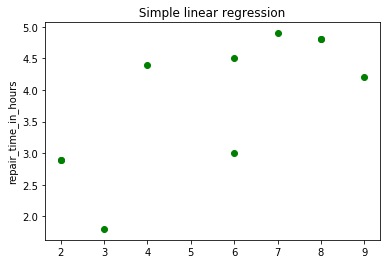

In [3]:
plt.scatter(tbl['months_since_last_service'], tbl['repair_time_in_hours'], color = "green")
plt.ylabel('repair_time_in_hours') 
plt.title(' Simple linear regression ')

In [4]:
from statsmodels.formula.api import ols
Reg = ols(formula ="repair_time_in_hours ~ months_since_last_service", data = tbl)
Fit1 = Reg.fit()
print(Fit1.summary())

                             OLS Regression Results                             
Dep. Variable:     repair_time_in_hours   R-squared:                       0.534
Model:                              OLS   Adj. R-squared:                  0.476
Method:                   Least Squares   F-statistic:                     9.174
Date:                  Sun, 08 Sep 2019   Prob (F-statistic):             0.0163
Time:                          16:08:01   Log-Likelihood:                -10.602
No. Observations:                    10   AIC:                             25.20
Df Residuals:                         8   BIC:                             25.81
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

C:\Users\E T Cell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [5]:
influence = result1.get_influence() 
resid_student = influence.resid_studentized_external

NameError: name 'result1' is not defined

In [ ]:
influence = Fit1.get_influence() 
resid_student = influence.resid_studentized_external

In [ ]:
plt.figure()
plt.scatter(tbl['months_since_last_service'],resid_student, color = "green")

In [ ]:
res = Fit1.resid # residuals
probplot = s.ProbPlot(res,stats.norm, fit=True)
fig = probplot.qqplot(line='45')
h = plt.title(' qpplot - residuals of OLS fit') 
plt.show()

In [ ]:
just_dummies = pd.get_dummies(tbl['type_of_repair'])
just_dummies

In [ ]:
just_dummies = pd.get_dummies(tbl['type_of_repair'])
step_1 = pd.concat([tbl, just_dummies], axis=1)
step_1
step_1.drop(['type_of_repair', 'mechanical'], inplace=True, axis=1)

# to run the regression we want to get rid of the strings 'mechanical' and 'electrical' 
# and we want to get rid of one dummy variable to avoid the dummy variable trap
# arbitrarily chose "mechanical", coefficients on "electrical" would show effect of "electrical"
# relative to "mechanical"
 


In [ ]:
step_1

In [ ]:
result = sm.OLS(step_1['repair_time_in_hours'], s.add_constant(step_1[['months_since_last_service', 'electrical']])).fit()
print (result.summary())

In [ ]:
tbl2 = pd.read_excel('dummy2.xlsx')
tbl2

In [ ]:
plt.scatter(tbl2['Experience'], tbl2['Salary'], color = "green")
plt.ylabel('Salary') 
plt.title(' Simple linear regression ')

In [ ]:
Reg2 = ols(formula ="Salary ~ Experience", data = tbl2)
Fit2 = Reg2.fit()
print(Fit2.summary())

In [ ]:
influence = Fit2.get_influence() 
resid_student = influence.resid_studentized_external

In [ ]:
plt.figure()
plt.scatter(tbl2['Experience'],resid_student, color = "green")

In [ ]:
res =Fit2.resid # residuals
probplot = s.ProbPlot(res,stats.norm, fit=True)
fig = probplot.qqplot(line='45')
h = plt.title(' qpplot - residuals of OLS fit') 
plt.show()

In [ ]:
just_dummies2 = pd.get_dummies(tbl2['Gender'])
just_dummies2

In [ ]:
step_1 = pd.concat([tbl2, just_dummies2], axis=1)
step_1.drop(['Gender', 'Male'], inplace=True, axis=1)
# to run the regression we want to get rid of the strings 'male' and 'female' 
# and we want to get rid of one dummy variable to avoid the dummy variable trap
# arbitrarily chose "male", coefficients on "female" would show effect of "female"
# relative to "male"
 
result = sm.OLS(step_1['Salary'], s.add_constant(step_1[['Female']])).fit()
print (result.summary())

In [ ]:
step_1 = pd.concat([tbl2, just_dummies2], axis=1)
step_1.drop(['Gender', 'Female'], inplace=True, axis=1)

 
result = sm.OLS(step_1['Salary'], s.add_constant(step_1[['Male']])).fit()
print (result.summary())